In [60]:
import pandas as pd
price = pd.read_csv('dog.csv', index_col=0)
price = price.stack().reset_index()
price['time'] = price['level_0'].str.replace('/','-')
price['time'] = price['time'] + '-' + price['level_1']
price['price'] = price[0]
price = price[['time','price']]
price

,time,price
0,2021-5-10-1,0.491483
1,2021-5-10-2,0.541771
2,2021-5-10-3,0.563822
3,2021-5-10-4,0.587511
4,2021-5-10-5,0.566575
...,...,...
427,2021-5-5-20,0.664187
428,2021-5-5-21,0.671045
429,2021-5-5-22,0.661554
430,2021-5-5-23,0.653484


In [61]:
sentimental_a = pd.read_csv('btc_a_0505.csv').T.iloc[:,:2]
sentimental_b = pd.read_csv('btc_b_0505.csv').T.iloc[:,:2]
sentimental_m = pd.read_csv('btc_m_0505.csv').T.iloc[:,:2]
sentimental_p = pd.read_csv('btc_p_0505.csv').T.iloc[:,:2]
sentimental_s = pd.read_csv('btc_s_0505.csv').T.iloc[:,:2]


sentimental_a.columns = ['a_sum','a_total']
sentimental_b.columns = ['b_sum','b_total']
sentimental_m.columns = ['m_sum','m_total']
sentimental_p.columns = ['p_sum','p_total']
sentimental_s.columns = ['s_sum','s_total']



# sentimental_total
sentimental_total = sentimental_a.merge(sentimental_b,left_index=True, right_index=True).\
    merge(sentimental_m,left_index=True, right_index=True).\
    merge(sentimental_p,left_index=True, right_index=True).\
    merge(sentimental_s,left_index=True, right_index=True)

sentimental_total['sum'] = sentimental_total['a_sum'] + sentimental_total['b_sum'] + sentimental_total['m_sum'] + \
                           sentimental_total['p_sum'] +sentimental_total['s_sum']


sentimental_total['total'] = sentimental_total['a_total'] + sentimental_total['b_total'] + \
                             sentimental_total['m_total'] + sentimental_total['p_total'] +sentimental_total['s_total']

sentimental_total['average'] = sentimental_total['sum'] / sentimental_total['total']
sentimental_total

,a_sum,a_total,b_sum,b_total,m_sum,m_total,p_sum,p_total,s_sum,s_total,sum,total,average
2021-5-10-0,594.209605,6594.0,589.646453,6300.0,590.701216,6348.0,552.347230,6148.0,606.176253,6294.0,2933.080757,31684.0,0.092573
2021-5-10-1,536.869267,5952.0,557.246962,6179.0,574.027190,6235.0,571.064174,6196.0,571.183453,6398.0,2810.391046,30960.0,0.090775
2021-5-10-10,834.578827,4690.0,860.233603,4656.0,871.496413,4801.0,831.508876,4551.0,811.106375,4418.0,4208.924095,23116.0,0.182078
2021-5-10-11,848.952029,4706.0,814.766653,4870.0,846.965947,4873.0,804.518664,4806.0,809.706232,4752.0,4124.909525,24007.0,0.171821
2021-5-10-12,777.564331,4835.0,801.856776,5006.0,708.012379,4654.0,801.685271,4877.0,710.616670,4505.0,3799.735428,23877.0,0.159138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-5-9-5,925.929207,6910.0,820.675160,6228.0,873.275073,6421.0,788.553401,6399.0,906.430810,6802.0,4314.863651,32760.0,0.131711
2021-5-9-6,734.215150,6344.0,764.788512,6555.0,809.236550,6807.0,822.803710,6830.0,788.782345,6651.0,3919.826267,33187.0,0.118113
2021-5-9-7,746.283896,6394.0,783.254785,6649.0,792.308094,6444.0,755.668497,6313.0,726.828508,6541.0,3804.343780,32341.0,0.117632
2021-5-9-8,768.734019,6590.0,771.329434,6450.0,742.638356,6596.0,741.469956,6465.0,700.074257,6304.0,3724.246022,32405.0,0.114928


In [62]:
df = price.merge(sentimental_total,left_on='time', right_index=True)
df = df[['time','average','price']]


train = df.iloc[:-24,:]
test  = df.iloc[-24:,:]
train.to_csv('df.csv')


train

,time,average,price
0,2021-5-10-1,0.090775,0.491483
1,2021-5-10-2,0.078678,0.541771
2,2021-5-10-3,0.082046,0.563822
3,2021-5-10-4,0.074608,0.587511
4,2021-5-10-5,0.079560,0.566575
...,...,...,...
189,2021-5-13-22,0.115416,0.418649
190,2021-5-13-23,0.078657,0.427158
192,2021-5-14-1,0.106035,0.412554
193,2021-5-14-2,0.115865,0.389250


In [63]:
test

,time,average,price
195,2021-5-14-4,0.102382,0.391446
196,2021-5-14-5,0.094428,0.396023
197,2021-5-14-6,0.118620,0.414343
198,2021-5-14-7,0.113650,0.430042
199,2021-5-14-8,0.097765,0.477849
200,2021-5-14-9,0.109888,0.485550
201,2021-5-14-10,0.103791,0.481246
202,2021-5-14-11,0.100013,0.487457
203,2021-5-14-12,0.115289,0.491179
204,2021-5-14-13,0.100929,0.509180


In [64]:
def predict(price_l1, average_l1):
    return 0.96882 * price_l1 + -0.08676 * average_l1 + 0.02652


In [65]:
predict_output = []
for i in test.itertuples():
    predict_output.append(predict(i.price, i.average))
predict_output

[0.3968780472475954,
 0.4020024314233874,
 0.4176523451413092,
 0.43329299588860787,
 0.4809875784693633,
 0.48739666840228035,
 0.4837558330913788,
 0.49010099142099384,
 0.4923815875722394,
 0.5110672071792531,
 0.5237720497661128,
 0.5608228405642318,
 0.532105403348586,
 0.5282398004993614,
 0.52533058279576,
 0.5290228195592368,
 0.5293168267735032,
 0.5370356944753594,
 0.5314826908015509,
 0.5439993637061339,
 0.5437844972415282,
 0.5550543767,
 0.573616905406642,
 0.5700076368415872]

In [66]:
df


,time,average,price
0,2021-5-10-1,0.090775,0.491483
1,2021-5-10-2,0.078678,0.541771
2,2021-5-10-3,0.082046,0.563822
3,2021-5-10-4,0.074608,0.587511
4,2021-5-10-5,0.079560,0.566575
...,...,...,...
214,2021-5-14-23,0.076518,0.540986
216,2021-5-15-1,0.099932,0.542861
217,2021-5-15-2,0.117960,0.556108
218,2021-5-15-3,0.117234,0.575203


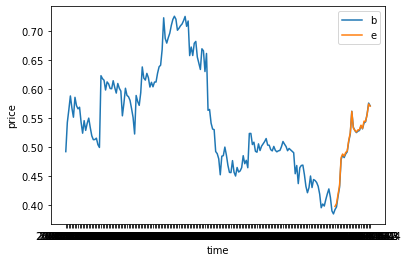

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
ax1 = sns.lineplot(x="time", y="price",data=df)
ax2 = sns.lineplot(x=test['time'], y=predict_output)
plt.legend('best')
plt.show()


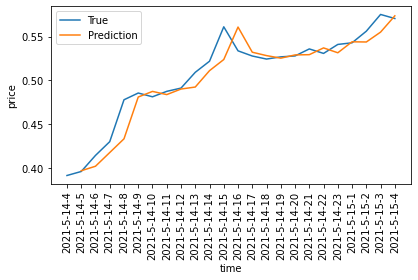

In [68]:
ax1 = sns.lineplot(x="time", y="price",data=test)
ax2 = sns.lineplot(x=test['time'][1:], y=predict_output[:-1])
plt.legend(["True", "Prediction"], loc ='best')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('prediction.png')
plt.show()

In [69]:
predict_output[:-1]

[0.3968780472475954,
 0.4020024314233874,
 0.4176523451413092,
 0.43329299588860787,
 0.4809875784693633,
 0.48739666840228035,
 0.4837558330913788,
 0.49010099142099384,
 0.4923815875722394,
 0.5110672071792531,
 0.5237720497661128,
 0.5608228405642318,
 0.532105403348586,
 0.5282398004993614,
 0.52533058279576,
 0.5290228195592368,
 0.5293168267735032,
 0.5370356944753594,
 0.5314826908015509,
 0.5439993637061339,
 0.5437844972415282,
 0.5550543767,
 0.573616905406642]

In [70]:
test["price"]


195    0.391446
196    0.396023
197    0.414343
198    0.430042
199    0.477849
200    0.485550
201    0.481246
202    0.487457
203    0.491179
204    0.509180
205    0.521836
206    0.561090
207    0.533690
208    0.527780
209    0.524304
210    0.526812
211    0.527868
212    0.535866
213    0.530747
214    0.540986
216    0.542861
217    0.556108
218    0.575203
219    0.570561
Name: price, dtype: float64